In [1]:
!pwd

/content


In [2]:
!ls -lrt

total 980
drwxr-xr-x 1 root root  4096 May 14 13:38 sample_data
-rw-r--r-- 1 root root 68508 May 21 21:07 Asia_Beas_StorageV2_628.nc
-rw-r--r-- 1 root root 79056 May 21 21:07 Asia_Bansagar_StorageV2_1723.nc
-rw-r--r-- 1 root root 85644 May 21 21:07 Asia_Baikal_StorageV2_316.nc
-rw-r--r-- 1 root root 61148 May 21 21:07 Asia_Almatti_StorageV2_1712.nc
-rw-r--r-- 1 root root 73008 May 21 21:07 Asia_Farakka_StorageV2_2311.nc
-rw-r--r-- 1 root root 65861 May 21 21:07 Asia_GovindBallabahPant_StorageV2_645.nc
-rw-r--r-- 1 root root 69209 May 21 21:07 Asia_NagarjunaSagar_StorageV2_963.nc
-rw-r--r-- 1 root root 70992 May 21 21:07 Asia_Tehri_StorageV2_4034.nc
-rw-r--r-- 1 root root 80657 May 21 21:07 Asia_GandhiSagar_StorageV2_519.nc
-rw-r--r-- 1 root root 73169 May 21 21:07 Asia_Srisailam_StorageV2_1500.nc
-rw-r--r-- 1 root root 64709 May 21 21:07 Asia_Toktogulskoye_StorageV2_612.nc
-rw-r--r-- 1 root root 60625 May 21 21:07 Asia_Tungabhadra_StorageV2_496.nc
-rw-r--r-- 1 root root 63036 May 21 21

In [3]:
import xarray as xr

In [10]:
ds = xr.open_dataset('Asia_Beas_StorageV2_628.nc')
ds

<xarray.Dataset> Size: 31kB
Dimensions:                    (time: 781)
Coordinates:
  * time                       (time) datetime64[ns] 6kB 2000-02-18 ... 2016-...
Data variables:
    surface_water_height       (time) float32 3kB ...
    surface_water_extent       (time) float32 3kB ...
    water_storage              (time) float32 3kB ...
    altimeter_source           (time) float32 3kB ...
    ice_flag                   (time) float32 3kB ...
    outlier_flag_hypsometry    (time) float32 3kB ...
    outlier_flag_surface_area  (time) float32 3kB ...
    model_flag                 (time) float32 3kB ...
Attributes: (12/43)
    title:                      Global Lake/Reservoir Storage Time Series Dat...
    summary:                    The Global Lake/Reservoir Storage Time Series...
    keywords:                   TERRESTRIAL HYDROSPHERE, SURFACE WATER PROCES...
    keywords_vocabulary:        Global Change Master Directory (GCMD)
    Conventions:                CF-1.6, ACDD-1.3, ISO 8601
    uuid:                       8a251ec8-e573-44fb-9161-573839e3c875
    ...                         ...
    date_created:               2019-08-29T12:09:38
    platform:                   TOPEX/Poseidon, Jason-1, Jason-2, Jason-3 (L2...
    platform_vocabulary:        NASA/GCMD Platform Keywords. Version 8.6
    instrument:                 TOPEX, Poseidon-2, Poseidon-3, Poseidon-3b (L...
    instrument_vocabulary:      NASA/GCMD Instrument Keywords. Version 8.6
    references:                 Khandelwal et al. (2017), An approach for glo...

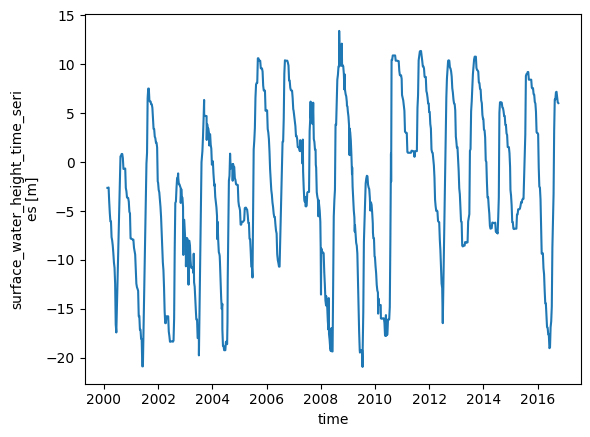

In [11]:
ds.surface_water_height.plot()

In [12]:
!rm -rf Asia_Toktogulskoye_StorageV2_612.nc

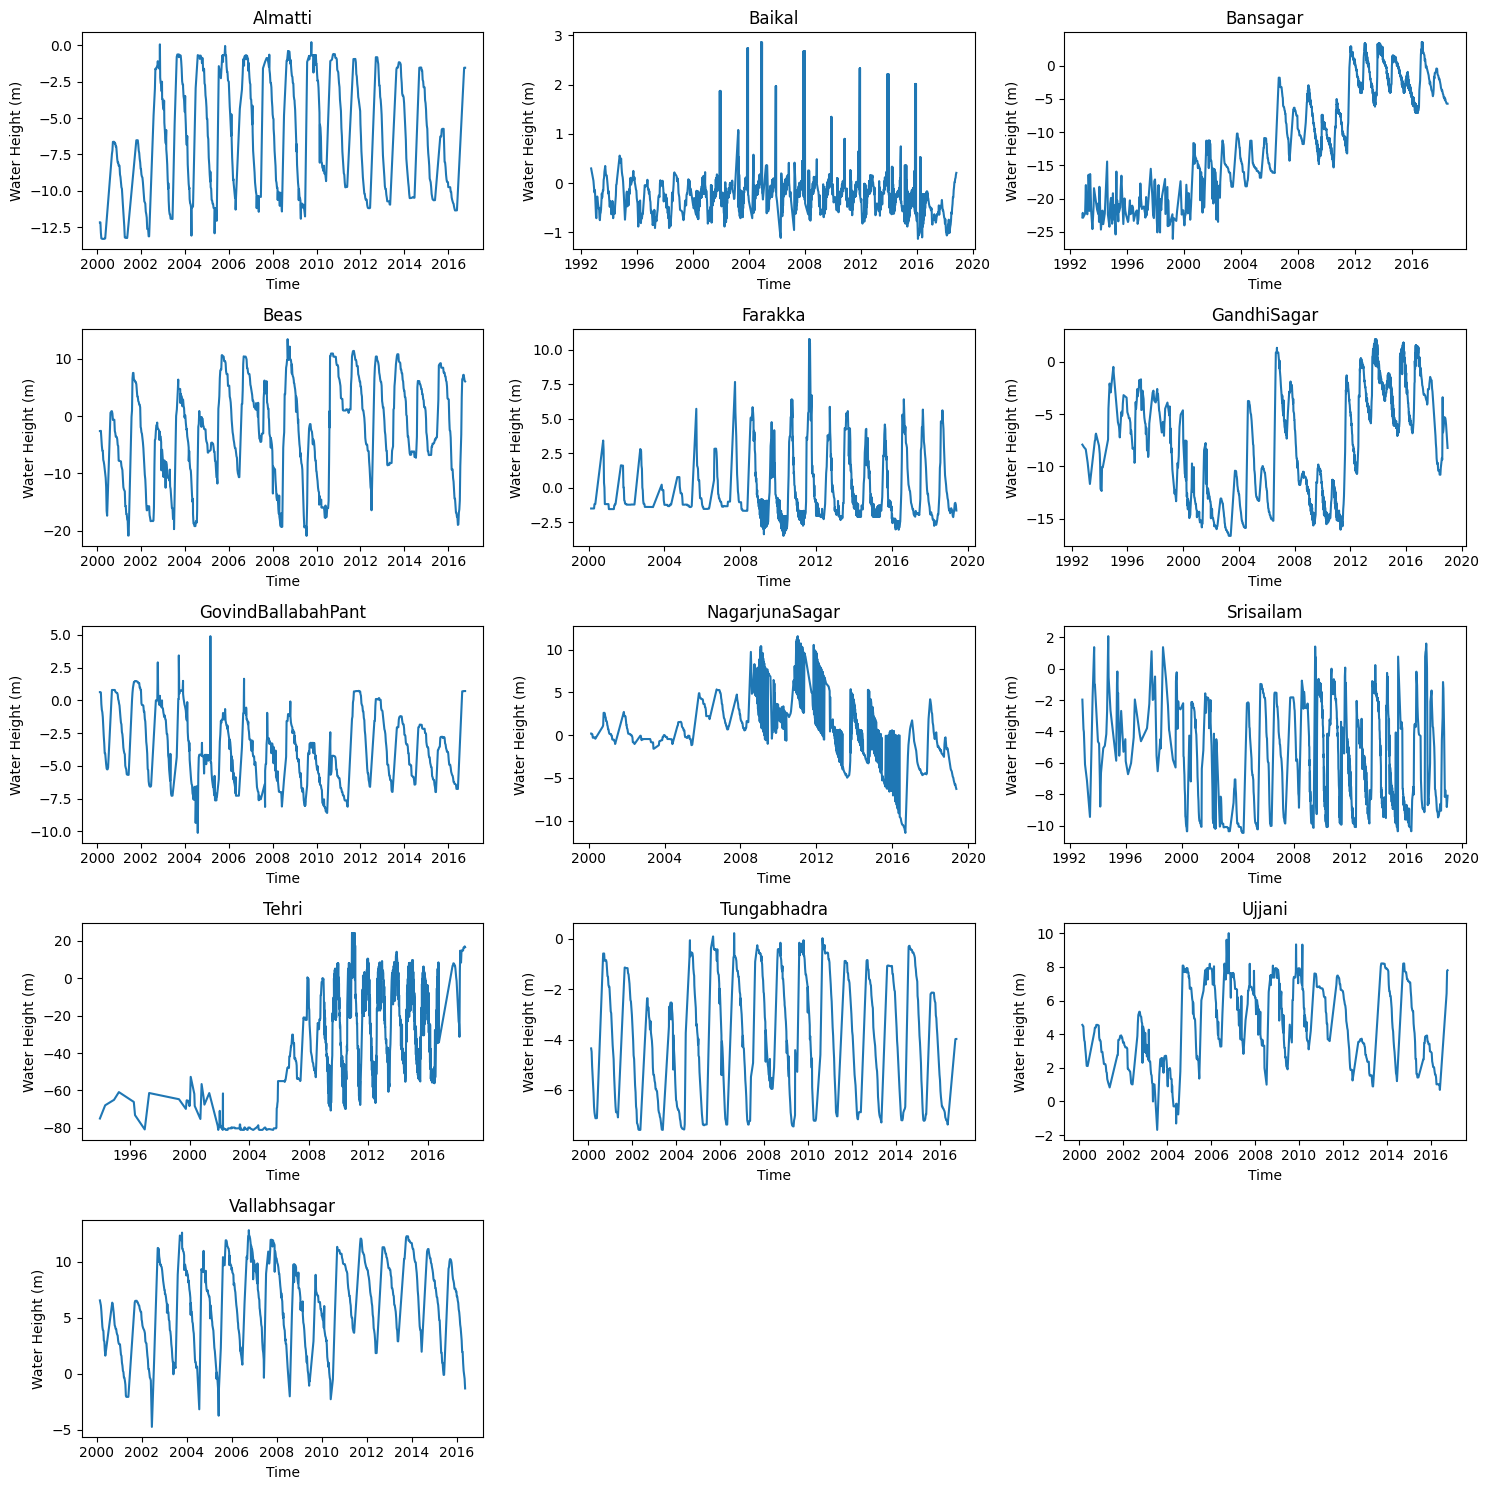

In [13]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import glob

# List all netCDF files in the current directory
nc_files = sorted(glob.glob("Asia_*_StorageV2_*.nc"))

# Extract reservoir names and open datasets
reservoirs = []
datasets = []

for file in nc_files:
    # Extract reservoir name
    parts = os.path.basename(file).split('_')
    reservoir_name = parts[1]  # e.g., 'Beas', 'Bansagar', etc.
    reservoirs.append(reservoir_name)

    # Load dataset
    ds = xr.open_dataset(file)
    datasets.append(ds)

# Set up the plot
n = len(datasets)
ncols = 3
nrows = -(-n // ncols)  # Ceiling division
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 3))
axes = axes.flatten()

# Plot each time series
for i, (reservoir, ds) in enumerate(zip(reservoirs, datasets)):
    ds.surface_water_height.plot(ax=axes[i])
    axes[i].set_title(reservoir)
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Water Height (m)')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

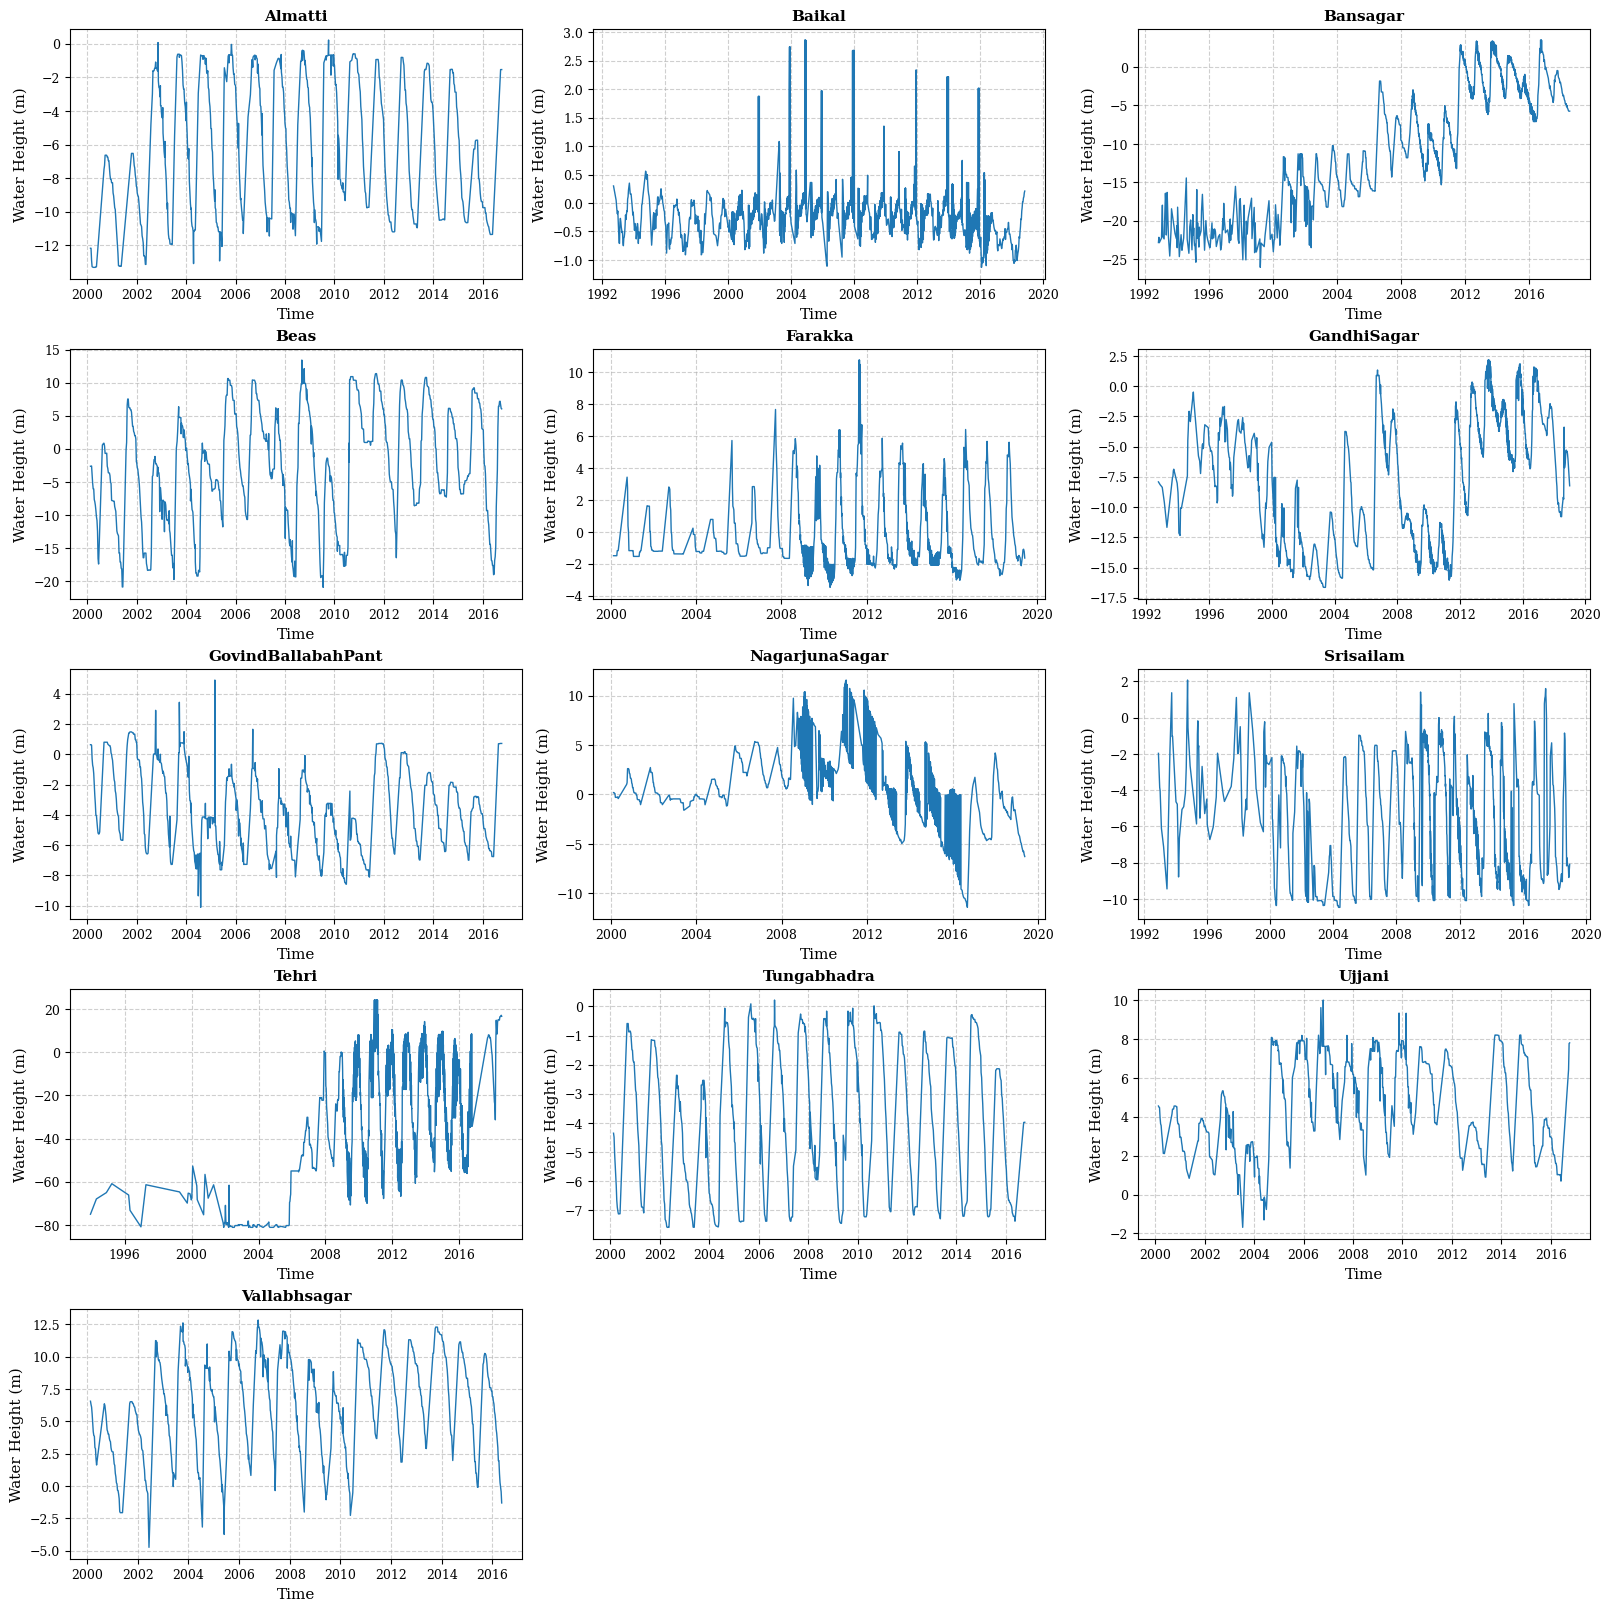

In [14]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import glob

# --- Styling for Scientific Publication ---
mpl.rcParams.update({
    "font.size": 10,
    "font.family": "serif",  # or "sans-serif", "Helvetica", etc.
    "axes.labelsize": 11,
    "axes.titlesize": 11,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 9,
    "figure.titlesize": 13
})

# List all netCDF files
nc_files = sorted(glob.glob("Asia_*_StorageV2_*.nc"))

# Extract reservoir names and open datasets
reservoirs = []
datasets = []

for file in nc_files:
    parts = os.path.basename(file).split('_')
    reservoir_name = parts[1]
    reservoirs.append(reservoir_name)
    ds = xr.open_dataset(file)
    datasets.append(ds)

# Plot setup
n = len(datasets)
ncols = 3
nrows = -(-n // ncols)  # Ceiling division
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, nrows * 3.2), constrained_layout=True)
axes = axes.flatten()

# Plot each time series
for i, (reservoir, ds) in enumerate(zip(reservoirs, datasets)):
    if "surface_water_height" in ds:
        ds.surface_water_height.plot(ax=axes[i], color='tab:blue', linewidth=1)
        axes[i].set_title(f"{reservoir}", fontweight='bold')
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('Water Height (m)')
        axes[i].grid(True, which='major', linestyle='--', alpha=0.6)
    else:
        axes[i].set_visible(False)  # Skip plots without data

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Optional: Save high-res figure
# plt.savefig("reservoir_water_heights.png", dpi=300, bbox_inches='tight')

plt.show()


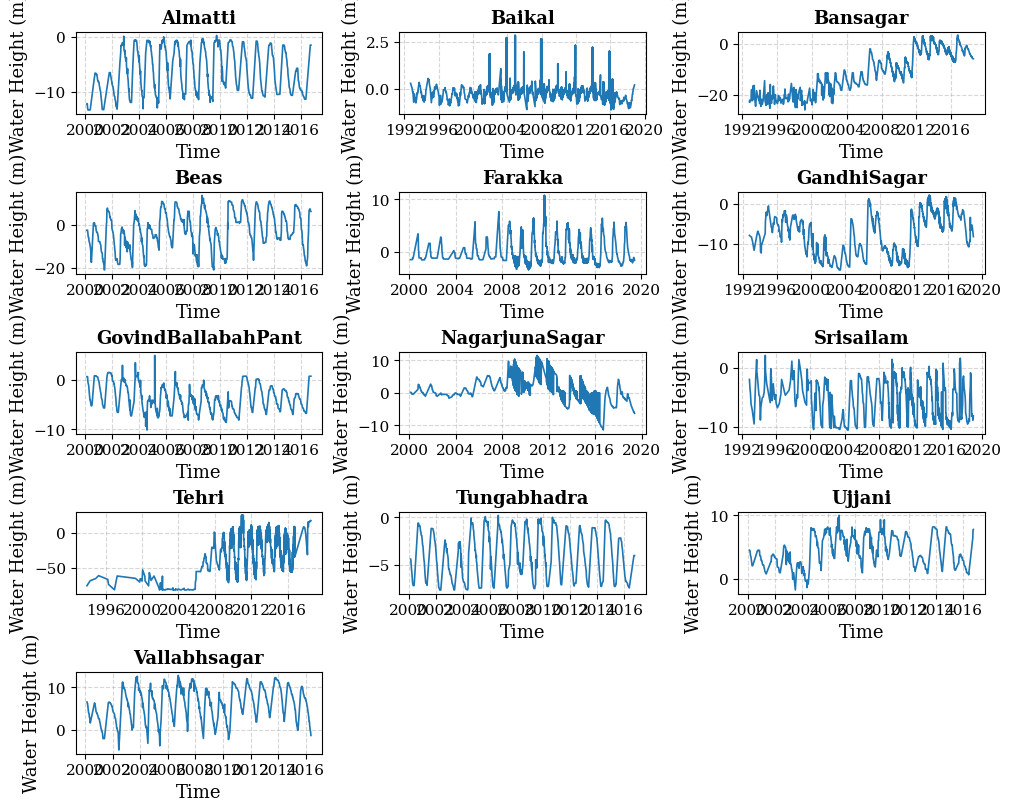

In [15]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import glob

# --- Scientific Plot Styling ---
mpl.rcParams.update({
    "font.size": 12,
    "font.family": "serif",
    "axes.labelsize": 13,
    "axes.titlesize": 13,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11,
    "figure.titlesize": 14,
    "axes.titleweight": "bold",
    "lines.linewidth": 1.2,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.alpha": 0.5,
})

# List all NetCDF files
nc_files = sorted(glob.glob("Asia_*_StorageV2_*.nc"))

# Extract reservoir names and load datasets
reservoirs = []
datasets = []

for file in nc_files:
    parts = os.path.basename(file).split('_')
    reservoir_name = parts[1]
    reservoirs.append(reservoir_name)
    ds = xr.open_dataset(file)
    datasets.append(ds)

# Set figure layout
n = len(datasets)
ncols = 3
nrows = -(-n // ncols)  # Ceiling division
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8), constrained_layout=True)
axes = axes.flatten()

# Plot each time series
for i, (reservoir, ds) in enumerate(zip(reservoirs, datasets)):
    if "surface_water_height" in ds:
        ds.surface_water_height.plot(ax=axes[i], color='tab:blue')
        axes[i].set_title(reservoir)
        axes[i].set_xlabel("Time")
        axes[i].set_ylabel("Water Height (m)")
    else:
        axes[i].set_visible(False)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Optional: Save high-resolution figure
# plt.savefig("reservoir_surface_heights.png", dpi=300, bbox_inches='tight')

plt.show()


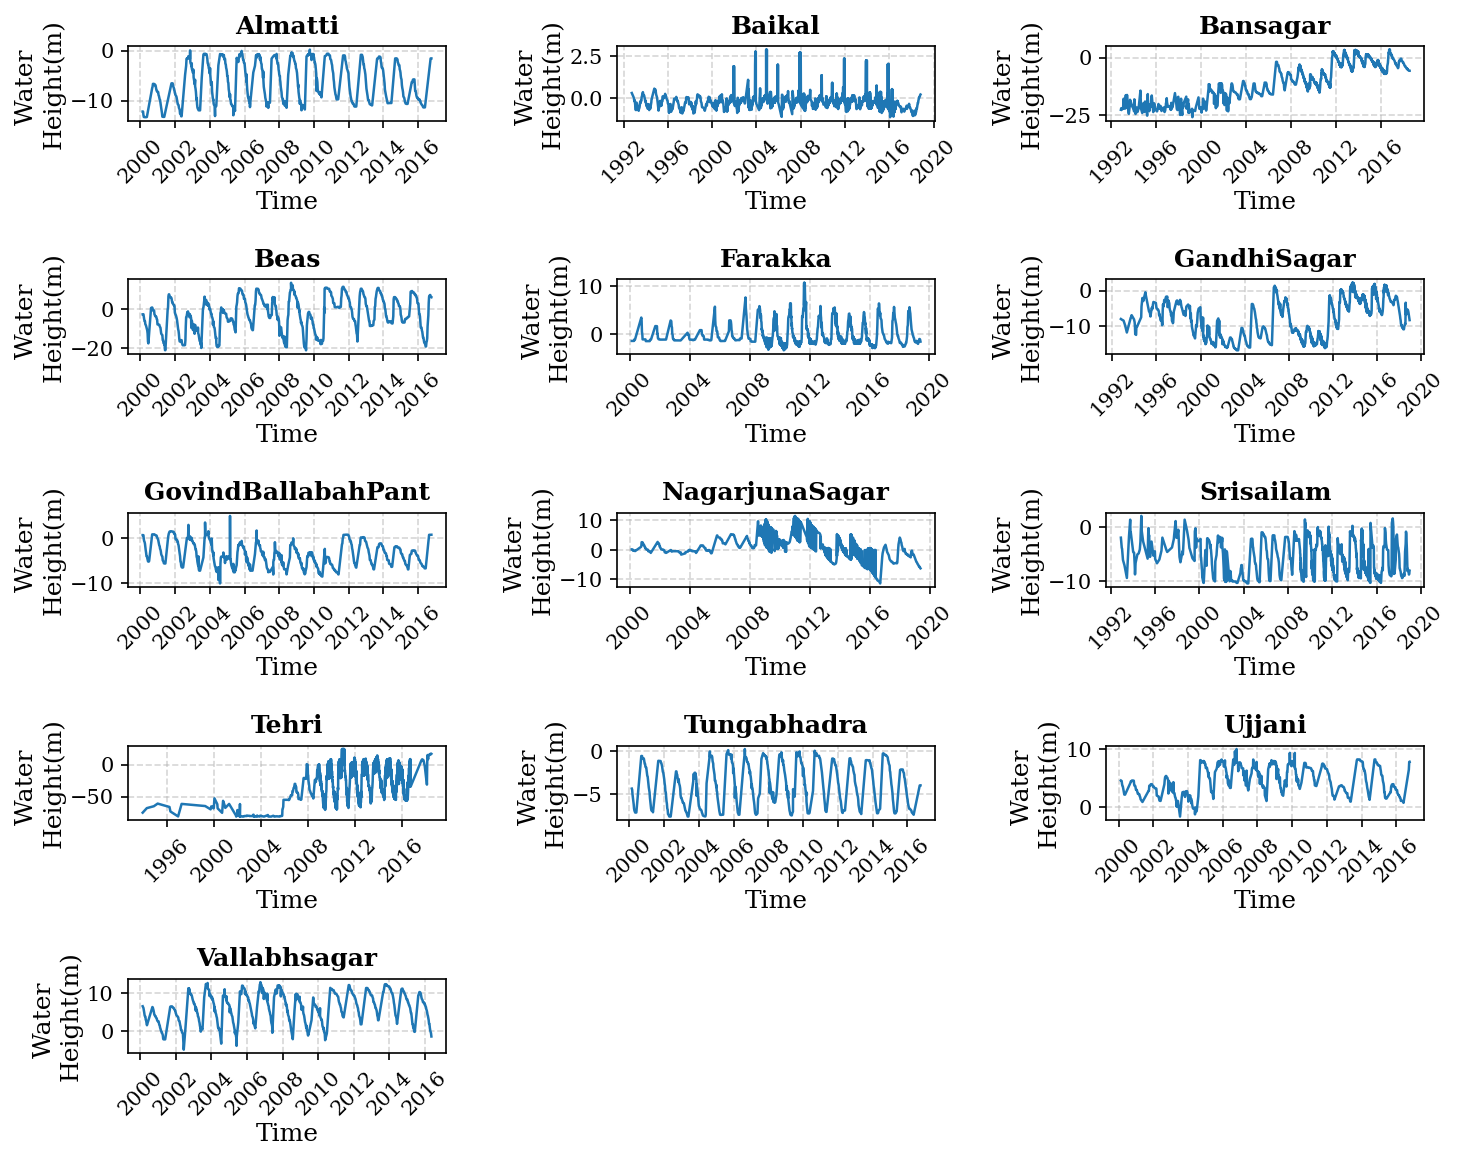

In [19]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import glob

# --- Scientific Plot Styling ---
mpl.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "DejaVu Serif"],
    "font.size": 11,
    "axes.labelsize": 12,
    "axes.titlesize": 13,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.titleweight": "bold",
    "lines.linewidth": 1.2,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.alpha": 0.5,
})

# List all NetCDF files
nc_files = sorted(glob.glob("Asia_*_StorageV2_*.nc"))

# Extract reservoir names and load datasets
reservoirs = []
datasets = []

for file in nc_files:
    parts = os.path.basename(file).split('_')
    reservoir_name = parts[1]
    reservoirs.append(reservoir_name)
    ds = xr.open_dataset(file)
    datasets.append(ds)

# Set figure layout
n = len(datasets)
ncols = 3
nrows = -(-n // ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8), dpi=150)
axes = axes.flatten()

# Plot each time series
for i, (reservoir, ds) in enumerate(zip(reservoirs, datasets)):
    if "surface_water_height" in ds:
        ds.surface_water_height.plot(ax=axes[i], color='tab:blue')
        axes[i].set_title(reservoir, fontsize=12, fontweight='bold')
        axes[i].set_xlabel("Time", labelpad=2)
        axes[i].set_ylabel("Water \nHeight(m)", labelpad=2)
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].set_visible(False)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=1.5)

# Optional: Save high-resolution figure
# plt.savefig("reservoir_surface_heights.png", dpi=300, bbox_inches='tight')

plt.savefig('pre_swot.png', dpi=500)